In [88]:
import pandas as pd
import numpy as np
Users = pd.read_csv("Users.csv")
Comments = pd.read_csv("Comments.csv")
Posts = pd.read_csv("Posts.csv")

array([[<AxesSubplot:title={'center':'CommentCount'}>]], dtype=object)

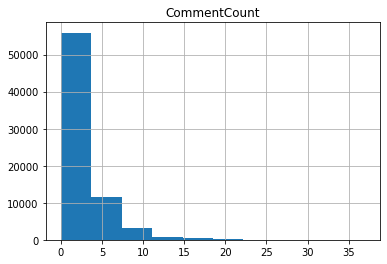

In [91]:
# Zadanie 1
Posts.hist("CommentCount")

In [67]:
# Zadanie 2
id = Posts[["ViewCount", "OwnerUserId"]]\
        .groupby(["OwnerUserId"])\
        .sum()\
        .sort_values("ViewCount", ascending=False)\
        .reset_index()['OwnerUserId'].values[0]
Users[Users["Id"] == id]['DisplayName'].values[0]

'Mark Mayo'

In [63]:
# Zadanie 3
AcceptedAnswers = Posts["AcceptedAnswerId"].dropna()

id = Posts[Posts["Id"].isin(AcceptedAnswers)][["Id", "OwnerUserId"]]\
        .groupby(["OwnerUserId"])\
        .count()\
        .sort_values("Id", ascending=False)\
        .reset_index()['OwnerUserId'].values[1]
Users[Users["Id"] == id]['DisplayName'].values[0]

'jpatokal'

In [97]:
# Zadanie 4
AcceptedAnswerScore = Posts[["AcceptedAnswerId", "Id"]]\
                    .dropna()\
                    .merge(Posts, left_on="AcceptedAnswerId", right_on="Id")\
                    .rename(columns={'Id_x': 'Id', 'Score': 'AcceptedAnswerScore'})[['Id', 'AcceptedAnswerScore']]
HighestScore = Posts[["Id"]]\
                    .merge(Posts, left_on="Id", right_on="ParentId")\
                    .rename(columns={'Id_x': 'Id', 'Score': 'HighestScore'})[['Id', 'HighestScore']]\
                    .groupby("Id")\
                    .max()

specificatedPosts = HighestScore.merge(AcceptedAnswerScore, left_on="Id", right_on="Id")

lenOfspecificatedPosts = len(specificatedPosts[specificatedPosts["HighestScore"] > specificatedPosts["AcceptedAnswerScore"]])

lenOfAllPosts = len(Posts[Posts["ParentId"].isnull()])
lenOfspecificatedPosts/lenOfAllPosts
# druga opcja to podzielic przez liczbe postow ktore posiadaja zaakceptowana odpowiedz, ale nie zachodzi dla nich warunek,
# ale ta wydawala mi sie bardziej naturalna

0.03541964955341924